In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.core.display import display, HTML,Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))

In [113]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%%time
df = pd.read_excel('Group_28_DataSet.xlsx')

df.head()

CPU times: user 1.95 s, sys: 26.5 ms, total: 1.98 s
Wall time: 1.98 s


,Sl No.,Group No.,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,266980,28,1,2010-02-05,23176.07,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
1,266981,28,2,2010-02-05,68292.15,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
2,266982,28,3,2010-02-05,13879.91,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
3,266983,28,4,2010-02-05,33057.95,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
4,266984,28,5,2010-02-05,40428.55,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010


In [115]:
#df.shape

In [114]:
#df.Date.value_counts().sort_index()

In [5]:
#df.Date.dt.dayname

In [6]:
df[df.Date.astype(str)=='2010-02-05']

,Sl No.,Group No.,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,266980,28,1,2010-02-05,23176.07,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
1,266981,28,2,2010-02-05,68292.15,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
2,266982,28,3,2010-02-05,13879.91,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
3,266983,28,4,2010-02-05,33057.95,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
4,266984,28,5,2010-02-05,40428.55,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,267047,28,94,2010-02-05,38174.75,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
68,267048,28,95,2010-02-05,110836.01,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
69,267049,28,96,2010-02-05,21018.53,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010
70,267050,28,97,2010-02-05,33119.18,False,49.47,2.962,126.442065,13.975,False,False,False,False,5,2,2010


In [7]:
#df.groupby('Dept')['Weekly_Sales'].describe()

In [8]:
df[df.Date.astype(str)=='2010-02-05'].nunique()



Sl No.          72
Group No.        1
Dept            72
Date             1
Weekly_Sales    72
IsHoliday        1
Temperature      1
Fuel_Price       1
CPI              1
Unemployment     1
Super_Bowl       1
Labor_Day        1
Thanksgiving     1
Christmas        1
week             1
month            1
year             1
dtype: int64

### 1. Aggregate the Data Appropriately

The Data is at a Date (actually, week with a single date) (2010-02-05, 2010-02-12, 2010-02-19 and so on...), Department level (for 1 date, there are 72 unique departments).

Also, from Data glossary, isHoliday, Christmans etc fields indicate if there was a holiday/christmas on THAT week.

Furthermore, we see for a given year week, we only have 1 month, so fiscal month is taken instead of calendar month

Hence, we aggregate it to a day/week level, taking total sales across all the Departments

In [9]:
df['year_week']=df['year']*100+df['week']

df['year_week']=df['year_week'].astype(str)

df.groupby('year_week').agg({'month':lambda x:x.nunique()}).value_counts()
# Furthermore, we see for a given year week, we only have 1 month, so fiscal month is taken instead of calendar month

month
1        143
dtype: int64

In [10]:
gpb_cols= ['year','week','year_week','Date','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment','Super_Bowl','Labor_Day','Thanksgiving','Christmas']

In [11]:
res = df.groupby(gpb_cols).agg({'Weekly_Sales':sum}).reset_index()
res.head()

,year,week,year_week,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Weekly_Sales
0,2010,5,201005,2010-02-05,False,49.47,2.962,126.442065,13.975,False,False,False,False,1672352.29
1,2010,6,201006,2010-02-12,True,47.87,2.946,126.496258,13.975,True,False,False,False,1558968.49
2,2010,7,201007,2010-02-19,False,54.83,2.915,126.526286,13.975,False,False,False,False,1491300.42
3,2010,8,201008,2010-02-26,False,50.23,2.825,126.552286,13.975,False,False,False,False,1542173.33
4,2010,9,201009,2010-03-05,False,53.77,2.987,126.578286,13.975,False,False,False,False,1608435.45


In [12]:
res.shape

(143, 14)

### 2.	Plot time series graph (the dependent variable is the Weekly Sales) and comment on the characteristics of the series based on the plot (i.e., interpret the plot)

Text(0.5, 1.0, 'Time Series Graph of Weekly Sales')

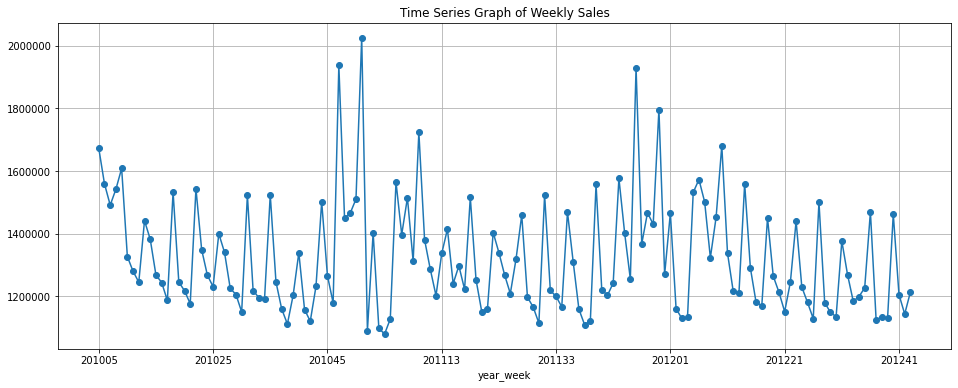

In [13]:
import matplotlib.ticker as ticker



ax=res.groupby('year_week')['Weekly_Sales'].sum().plot(figsize=(16,6),marker='o',grid=True)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
plt.title('Time Series Graph of Weekly Sales')

<Figure size 2880x1080 with 0 Axes>

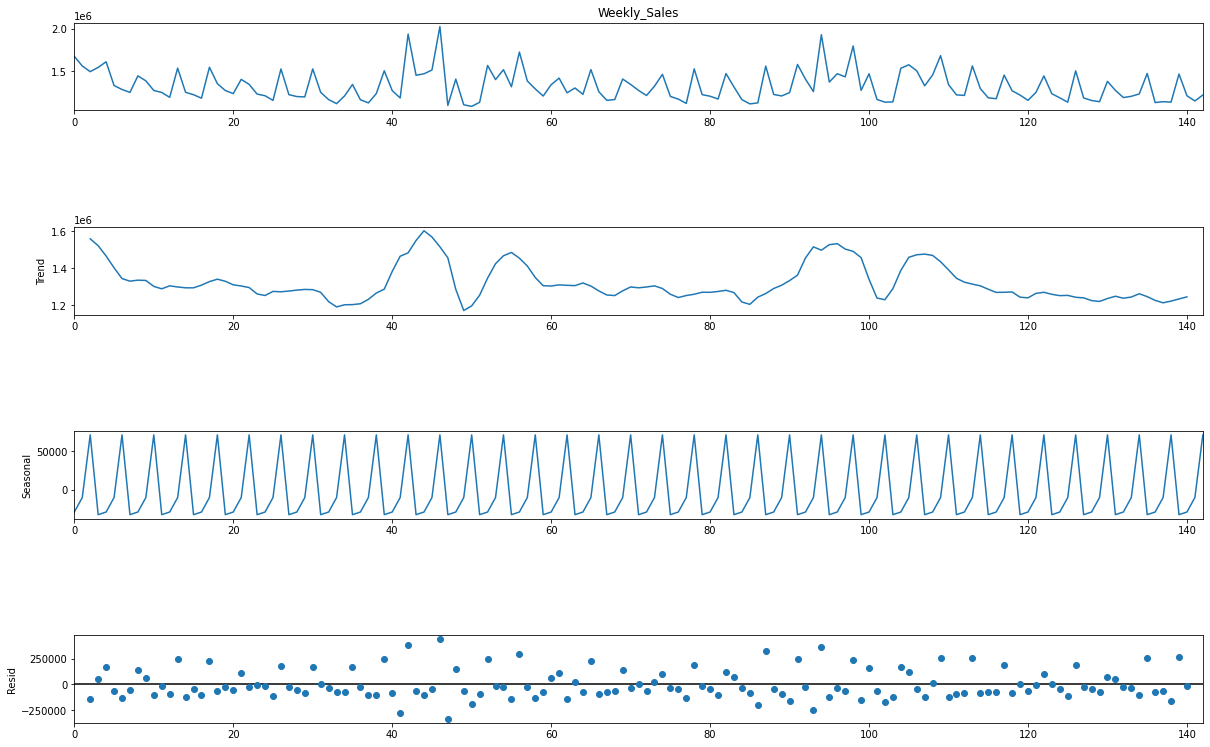

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose


#f,ax = plt.subplots(4,1,figsize=(16,6))
plt.figure(figsize=(40,15))
result = seasonal_decompose(res['Weekly_Sales'], model='additive', period=4)
fig=result.plot()
fig.set_figheight(12)
fig.set_figwidth(20)
plt.show()

##### ADF Test for stationarity

In [15]:
from statsmodels.tsa.stattools import adfuller  

adf = adfuller(res['Weekly_Sales'].values) 
print('Augmented Dickey-Fuller Statistic: %f' % adf[0])  
print('p-value: %f' % adf[1]) 

Augmented Dickey-Fuller Statistic: -2.950502
p-value: 0.039783


### 3.	Draw the ACF and PACF plots for Weekly Sales and interpret the plots.

/Users/abasu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


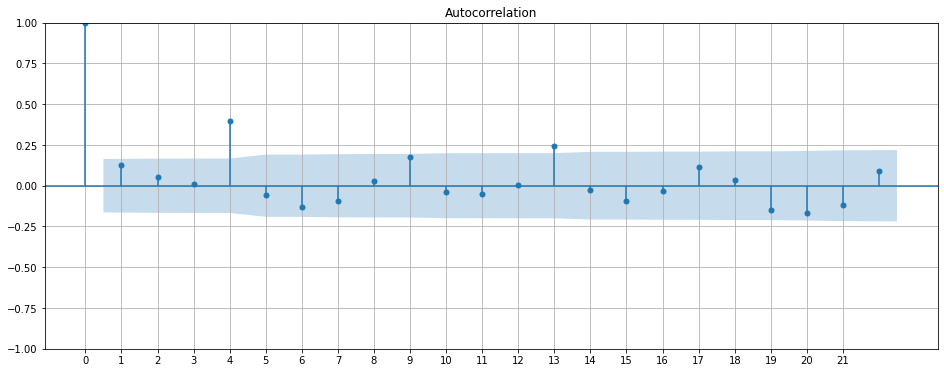

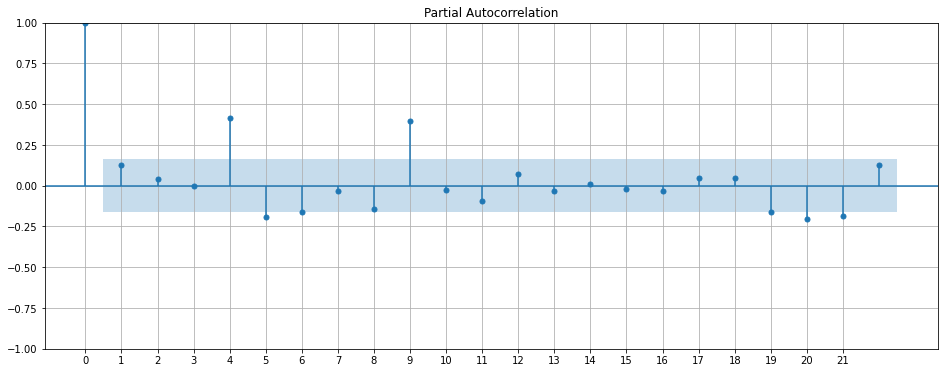

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

f,ax=plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plot_acf(res['Weekly_Sales'],ax=ax)
plt.xticks(range(0,22),labels=range(0,22));
plt.grid()
#plt.show();
f,ax=plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plot_pacf(res['Weekly_Sales'],ax=ax)
plt.xticks(range(0,22),labels=range(0,22));
plt.grid()
plt.show();

#### There are peaks at lag 4 and 13 (gap of 9) in the ACF function, this could suggest presence of seasonal data. Similarly, PACF function shows a peaks at lags of 4 and 9



#### Let us look at ACF and PACF for Seasonal differenced data (lag- 4)

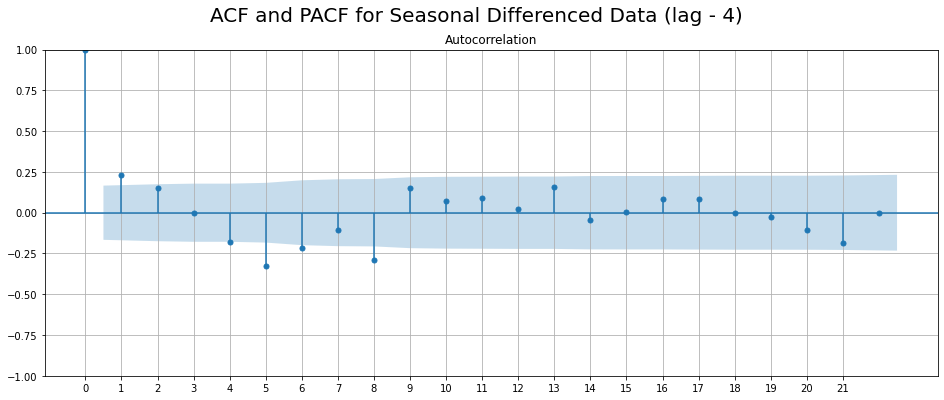

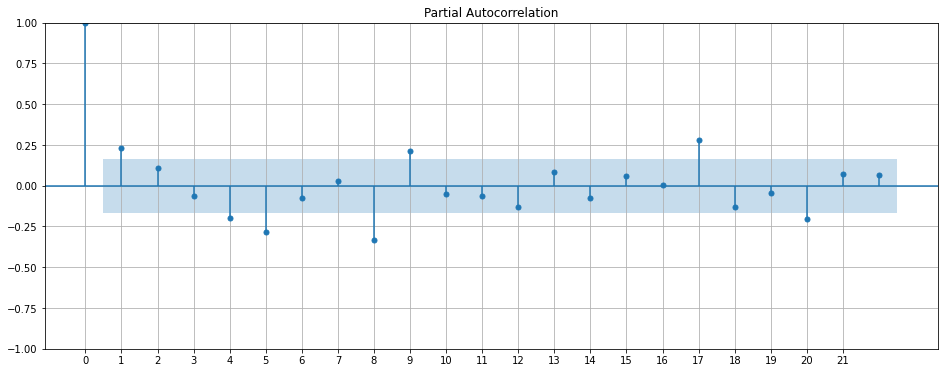

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

seas_dif = res['Weekly_Sales'].shift(4) - res['Weekly_Sales']

seas_dif=seas_dif.dropna()

f,ax=plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plot_acf(seas_dif,ax=ax)
plt.xticks(range(0,22),labels=range(0,22));
plt.grid()
plt.suptitle('ACF and PACF for Seasonal Differenced Data (lag - 4)',size=20)
#plt.show();
f,ax=plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plot_pacf(seas_dif,ax=ax)
plt.xticks(range(0,22),labels=range(0,22));
plt.grid()
plt.show();

#### We see, seasonal differenced series shows a wavelike pattern at low lags... from here, p,d,q and seasonal P,D,Q: 

##### PACF function: tails off after 1, to increase as 4,5 (negative.) let us take p/P as [1,5] and then see which model is better

##### ACF Function: Since it tails off from 1, and there is a spike at 5, let us take q/Q as [0,1,5] and see which is better model

##### Both ACF and PACF do not show any negative spike at lag 1, and from ADF previously we saw timeseries is stationary, hence we take d/D as 0, but include [1] as well for grid search

In [18]:
#from pmdarima.arima import auto_arima

# Q4.	Build the appropriate forecasting models to forecast the Weekly Sales for the next quarter.  You decide which model is/are appropriate in your opinion.  (Explain why these are appropriate in your opinion).  You have to decide which variables need to be included in the model.

In [19]:
%time
res.head()
sales = res.set_index('Date')['Weekly_Sales']
#sales.index= pd.DatetimeIndex.isocalender().week(sales.index)
exog = res.set_index('Date')[[	'IsHoliday','Temperature','Fuel_Price','CPI','Unemployment','Super_Bowl','Labor_Day','Thanksgiving','Christmas']].astype(float)
#exog.index= pd.DatetimeIndex.isocalender().week(exog.index)


#arima_model = auto_arima(sales,start_p=0,start_q=0,max_p=9,max_q=9,d=0,max_d=2,start_P=0, start_Q=0, max_P=9,max_Q=9,D=0, max_D=2,m=9,seasonal=True,stepwise=True,stationary=False)
#arima_model.summary()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


In [20]:
#arima_model = auto_arima(sales,start_p=0,start_q=0,max_p=9,max_q=9,d=0,max_d=2,start_P=0, start_Q=0, max_P=9,max_Q=9,D=0, max_D=2,m=4,seasonal=True,stepwise=True,stationary=False)
#arima_model.summary()

In [21]:
# ?auto_arima


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
model = SARIMAX(endog=sales,exog=exog,
                order =(0,0,1),
                seasonal_order = (0,0,1,4),
                mle_regression=True,
                simple_differencing=True
               )

results = model.fit()

/Users/abasu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/abasu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [24]:
summ=results.summary()

summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 4)   Log Likelihood               -1902.059
Date:                           Sat, 18 Feb 2023   AIC                           3828.119
Time:                                   16:27:19   BIC                           3863.673
Sample:                               02-05-2010   HQIC                          3842.566
                                    - 10-26-2012                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
IsHoliday     9.773e+04   4.86e+04      2.010      0.044    2429.773    1.93e+05
Temperature  -3560.2424   1285.438     -2.770      0.006   -6079.655   -1040.830
Fuel_Price   -6.336e+04   7.39e+04     -0.857      0.391   -2.08e+05    8.15e+04
CPI           1.294e+04   3892.084      3.325      0.001    5312.236    2.06e+04
Unemployment  9820.5625   2.11e+04      0.466      0.641   -3.15e+04    5.11e+04
Super_Bowl    1.284e+04    1.2e+05      0.107      0.915   -2.22e+05    2.48e+05
Labor_Day    -6219.6451   9.01e+04     -0.069      0.945   -1.83e+05     1.7e+05
Thanksgiving   4.37e+05   1.43e+05      3.066      0.002    1.58e+05    7.16e+05
Christmas    -3.459e+05   1.31e+05     -2.632      0.008   -6.03e+05   -8.83e+04
ma.L1            0.1849      0.129      1.434      0.152      -0.068       0.438
ma.S.L4          0.2645      0.074      3.568      0.000       0.119       0.410
sigma2        2.255e+10      5.120    4.4e+09      0.000    2.26e+10    2.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                26.94
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.66
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.58e+24. Standard errors may be unstable.
"""

In [25]:
residual = results.resid



/Users/abasu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


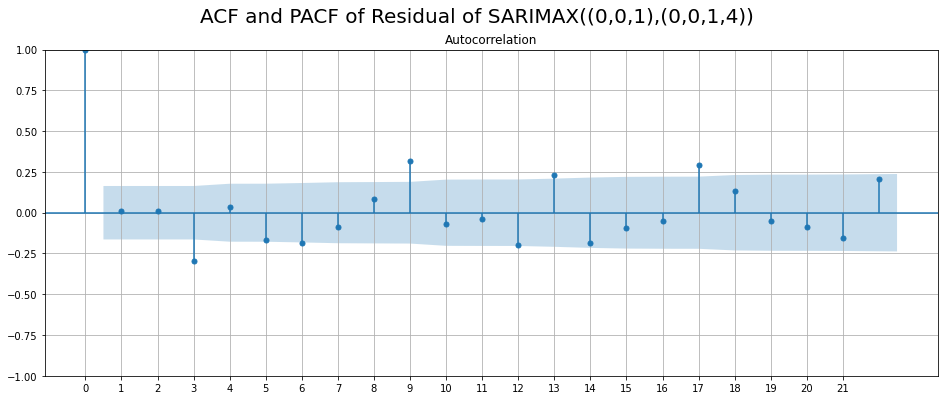

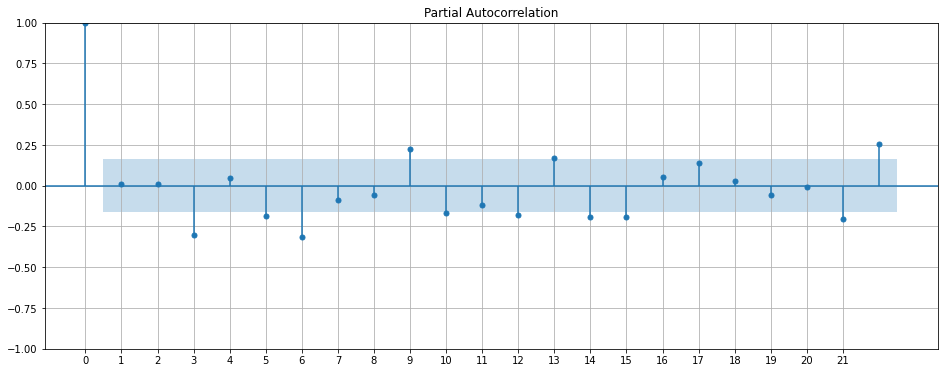

In [26]:
f,ax=plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plot_acf(residual,ax=ax)
plt.xticks(range(0,22),labels=range(0,22));
plt.grid()
plt.suptitle('ACF and PACF of Residual of SARIMAX((0,0,1),(0,0,1,4))',size=20)
#plt.show();
f,ax=plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plot_pacf(residual,ax=ax)
plt.xticks(range(0,22),labels=range(0,22));
plt.grid()
plt.show();

##### From Errors, we see spikes at 3 and multiples of 3. This would suggest an AR component p/P = 3. let us add that in list before we test multiple models with these permutations

In [29]:
p = [0,1,3,5]
q = [0,1,5]
d = [0,1]

m = 4

In [30]:
%%time

import warnings
warnings.filterwarnings("ignore")
import tqdm.notebook as tqdm
import itertools
from sklearn import metrics


pdq=[]
seasonal_pdq=[]
for p_ in p:
    for q_ in q:
        for d_ in d:
            pdq.append((p_,d_,q_))
            seasonal_pdq.append((p_,d_,q_,m))
            


results_list=[]

for param in tqdm.tqdm(pdq):
    for seasonal_param in seasonal_pdq:
        fin_res={}
        try: 
            model = SARIMAX(endog=sales,exog=exog,
                order =param,
                seasonal_order = seasonal_param,
                mle_regression=True,
                simple_differencing=True
               )

            results = model.fit()
            
            
            fin_res['SARIMAX']='({}),({})'.format(param,seasonal_param)
            #print(fin_res)
            
            val_srt = len(sales)-len(results.forecasts[0])
            
            fin_res['MAPE']=metrics.mean_absolute_percentage_error(sales.values[val_srt:],(results.forecasts.reshape(len(results.forecasts[0]),)))
            fin_res['MAE']=metrics.mean_absolute_error(sales.values[val_srt:],(results.forecasts.reshape(len(results.forecasts[0]),)))
            fin_res['AIC']=pd.read_html(((results.summary().tables[0])).as_html())[0].iloc[2,3]
            fin_res['BIC']=pd.read_html(((results.summary().tables[0])).as_html())[0].iloc[3,3]
            results_list.append(fin_res)

        except:
            pass

  0%|          | 0/24 [00:00<?, ?it/s]

CPU times: user 2min 53s, sys: 2.41 s, total: 2min 55s
Wall time: 2min 45s


In [112]:
fin_results = pd.DataFrame(results_list)

fin_results=fin_results.set_index('SARIMAX')

fin_results_rank = fin_results.rank(method = 'dense')#.sum(axis=1)
fin_results_rank['COMBINED_RANK (Sum of Ranks, Lower is Better)']=fin_results_rank.sum(axis=1)

fin_results.merge(fin_results_rank,left_index=True,right_index=True,suffixes=( ' Value', ' Column Rank')).sort_values('COMBINED_RANK (Sum of Ranks, Lower is Better)',ascending=True).head(20).style.format('{:,.1f}').background_gradient(axis=0,
    cmap='YlOrRd',subset = ['COMBINED_RANK (Sum of Ranks, Lower is Better)'])


,MAPE Value,MAE Value,AIC Value,BIC Value,MAPE Column Rank,MAE Column Rank,AIC Column Rank,BIC Column Rank,"COMBINED_RANK (Sum of Ranks, Lower is Better)"
SARIMAX,,,,,,,,,
"((5, 0, 5)),((0, 0, 0, 4))",0.1,"85,976.4","3,792.1","3,851.3",3.0,3.0,181.0,182.0,369.0
"((3, 0, 5)),((3, 0, 0, 4))",0.1,"84,423.9","3,793.4","3,855.6",2.0,2.0,182.0,185.0,371.0
"((3, 0, 5)),((1, 0, 0, 4))",0.1,"86,931.5","3,795.4","3,851.7",4.0,4.0,183.0,183.0,374.0
"((3, 0, 5)),((0, 0, 0, 4))",0.1,"89,081.4","3,796.7","3,850.0",6.0,6.0,184.0,181.0,377.0
"((3, 1, 5)),((1, 1, 0, 4))",1.0,"1,317,385.4","3,738.7","3,794.3",194.0,177.0,1.0,12.0,384.0
"((3, 0, 5)),((5, 0, 0, 4))",0.1,"84,005.4","3,797.1","3,865.2",1.0,1.0,185.0,209.0,396.0
"((3, 0, 1)),((5, 0, 0, 4))",0.1,"93,094.8","3,808.2","3,864.5",10.0,9.0,190.0,204.0,413.0
"((5, 0, 1)),((0, 0, 1, 4))",0.1,"96,325.3","3,807.4","3,857.7",20.0,20.0,189.0,188.0,417.0
"((5, 0, 1)),((0, 0, 0, 4))",0.1,"97,115.7","3,807.0","3,854.4",23.0,23.0,188.0,184.0,418.0


In [36]:
len(fin_results)

364

# Q5: Select the final model (it can be a single model or combination of 2 or more models) based on a criterion (or criteria such as MAD, MSE, MAPE etc.) which is most appropriate in your opinion. Explain why, in your opinion, this particular criterion (or criteria) is most appropriate.

### Chosen SARIMAX model ((5,0,5),(0,0,0,4)), Now Let us see the contribution by Exogenous Variables, and if there is scope of feature selection

In [131]:
model = SARIMAX(endog=sales,exog=exog,
                order =(3,0,5),
                seasonal_order = (3,0,0,4),
                mle_regression=True,
                simple_differencing=True
               )
model_results= model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(3, 0, 5)x(3, 0, [], 4)   Log Likelihood               -1875.676
Date:                            Sat, 18 Feb 2023   AIC                           3793.352
Time:                                    20:56:29   BIC                           3855.571
Sample:                                02-05-2010   HQIC                          3818.635
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
IsHoliday     9.773e+04    5.5e+04      1.777      0.076   -1.01e+04    2.06e+05
Temperature  -3560.2425    760.511     -4.681      0.000   -5050.817   -2069.668
Fuel_Price   -6.336e+04   5.45e+04     -1.163      0.245    -1.7e+05    4.34e+04
CPI           1.294e+04   3138.026      4.124      0.000    6790.161    1.91e+04
Unemployment  9820.5623   1.77e+04      0.554      0.580   -2.49e+04    4.46e+04
Super_Bowl    1.284e+04   1.15e+05      0.112      0.911   -2.12e+05    2.38e+05
Labor_Day    -6219.6452   9.72e+04     -0.064      0.949   -1.97e+05    1.84e+05
Thanksgiving   4.37e+05   1.81e+05      2.420      0.016    8.31e+04    7.91e+05
Christmas    -3.459e+05   1.44e+05     -2.395      0.017   -6.29e+05   -6.28e+04
ar.L1           -0.4600      0.256     -1.796      0.072      -0.962       0.042
ar.L2           -0.8071      0.071    -11.443      0.000      -0.945      -0.669
ar.L3           -0.7084      0.248     -2.856      0.004      -1.195      -0.222
ma.L1            0.5941      0.269      2.210      0.027       0.067       1.121
ma.L2            0.9408      0.174      5.392      0.000       0.599       1.283
ma.L3            0.5324      0.317      1.679      0.093      -0.089       1.154
ma.L4            0.3789      0.177      2.146      0.032       0.033       0.725
ma.L5           -0.2129      0.219     -0.971      0.331      -0.643       0.217
ar.S.L4         -0.3004      0.178     -1.689      0.091      -0.649       0.048
ar.S.L8         -0.1746      0.173     -1.012      0.312      -0.513       0.164
ar.S.L12        -0.2343      0.149     -1.573      0.116      -0.526       0.058
sigma2        1.896e+10      1.500   1.26e+10      0.000     1.9e+10     1.9e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               105.91
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             1.10
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.44e+27. Standard errors may be unstable.
"""

##### From Regression Summary, We see only 
1. Temperature
2. CPI
3. Thanksgiving
4. Christmas

##### Have p-value < 0.05 and are hence significant

## We now Chose our Final ARIMAX model:

##### ((5,0,5),(0,0,0,4)) , X=[Temperature, CPI, Thanksgiving, Christmas]

In [132]:
final_model = SARIMAX(endog=sales,exog=exog[['Temperature','CPI','Thanksgiving','Christmas']],
                order =(3,0,5),
                seasonal_order = (3,0,0,4),
                mle_regression=True,
                simple_differencing=True
               )
model_results= final_model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(3, 0, 5)x(3, 0, [], 4)   Log Likelihood               -1879.390
Date:                            Sat, 18 Feb 2023   AIC                           3790.780
Time:                                    20:57:23   BIC                           3838.185
Sample:                                02-05-2010   HQIC                          3810.043
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Temperature  -3850.5914    987.742     -3.898      0.000   -5786.529   -1914.653
CPI           1.235e+04    507.864     24.319      0.000    1.14e+04    1.33e+04
Thanksgiving  5.436e+05   1.09e+05      4.984      0.000     3.3e+05    7.57e+05
Christmas     -2.34e+05   1.04e+05     -2.242      0.025   -4.38e+05   -2.94e+04
ar.L1           -0.3609      0.320     -1.127      0.260      -0.988       0.267
ar.L2           -0.8290      0.084     -9.822      0.000      -0.994      -0.664
ar.L3           -0.6072      0.313     -1.939      0.053      -1.221       0.007
ma.L1            0.6541      0.336      1.947      0.052      -0.004       1.313
ma.L2            1.1036      0.162      6.797      0.000       0.785       1.422
ma.L3            0.6621      0.403      1.641      0.101      -0.129       1.453
ma.L4            0.5222      0.196      2.671      0.008       0.139       0.905
ma.L5           -0.1108      0.210     -0.527      0.598      -0.523       0.302
ar.S.L4         -0.1414      0.174     -0.811      0.418      -0.483       0.200
ar.S.L8         -0.0809      0.138     -0.585      0.558      -0.352       0.190
ar.S.L12        -0.2046      0.159     -1.290      0.197      -0.515       0.106
sigma2        1.892e+10      1.396   1.36e+10      0.000    1.89e+10    1.89e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.54
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             0.99
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.66e+25. Standard errors may be unstable.
"""

# Q6: Carry out the analysis of errors.  Carry out the interpretation of the errors

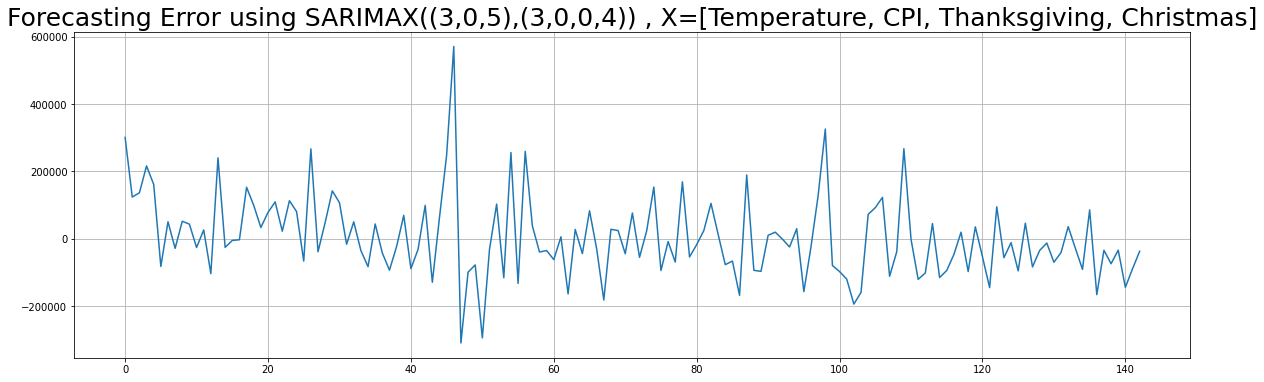

In [133]:
residual = model_results.resid

plt.figure(figsize=(20,6))
plt.plot(range(len(residual)),residual)
plt.grid();
plt.title('Forecasting Error using SARIMAX((3,0,5),(3,0,0,4)) , X=[Temperature, CPI, Thanksgiving, Christmas]',size=25);

In [134]:
### ADF Test on Errors:

residual = model_results.resid

adf = adfuller(residual) 
print('Augmented Dickey-Fuller Statistic: %f' % adf[0])  
print('p-value: %f' % adf[1]) 

Augmented Dickey-Fuller Statistic: -11.965888
p-value: 0.000000


##### 1. We see from ADF Test, the residuals do not show and non-stationary behavior

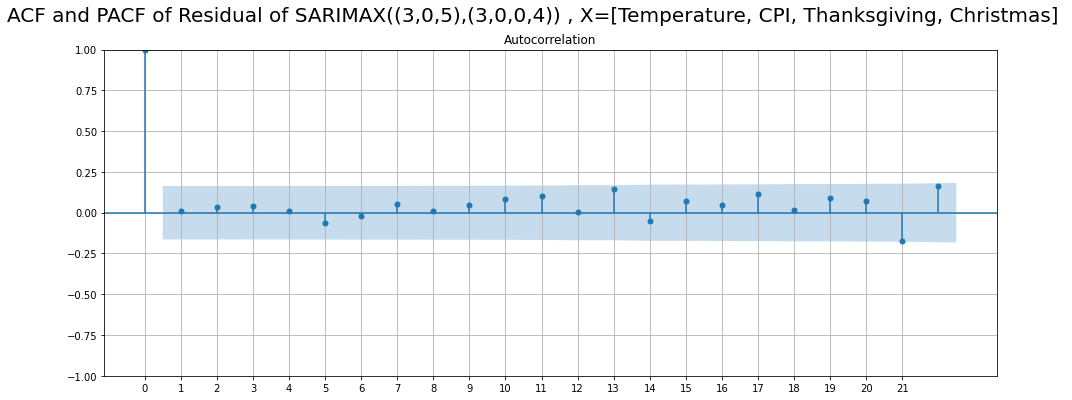

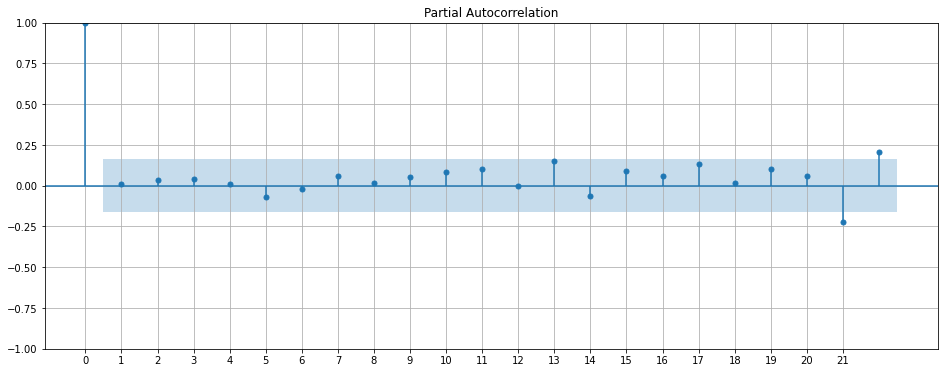

In [141]:




f,ax=plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plot_acf(residual,ax=ax)
plt.xticks(range(0,22),labels=range(0,22));
plt.grid()
plt.suptitle('ACF and PACF of Residual of SARIMAX((3,0,5),(3,0,0,4)) , X=[Temperature, CPI, Thanksgiving, Christmas] ',size=20)
#plt.show();
f,ax=plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plot_pacf(residual,ax=ax)
plt.xticks(range(0,22),labels=range(0,22));
plt.grid()
plt.show();

#### 2. From ACF and PACF plot of residuals, we do not see any major spikes/peaks

# Q7: Forecast the weekly revenue for next quarter along with the Prediction Intervals.

##### 1. let us assume Exogenous variables stay same for next quarter (next 4 weeks). We use the exog variables same as the last observation in the series

In [136]:
exog_forecast = exog[['Temperature','CPI','Thanksgiving','Christmas']].iloc[-1]

intervals = 13 # Number of Weeks in a Quarter

exog_forecast = pd.DataFrame(exog_forecast).T

exog_forecast=pd.concat([exog_forecast]*intervals)

forecasts = model_results.get_forecast(intervals,exog=exog_forecast).summary_frame(alpha=0.05)[['mean','mean_ci_lower','mean_ci_upper']]

In [137]:
final_plot=pd.concat([sales.to_frame(),forecasts])

In [142]:
final_plot.iloc[-14]['mean']=final_plot.iloc[-14]['Weekly_Sales']

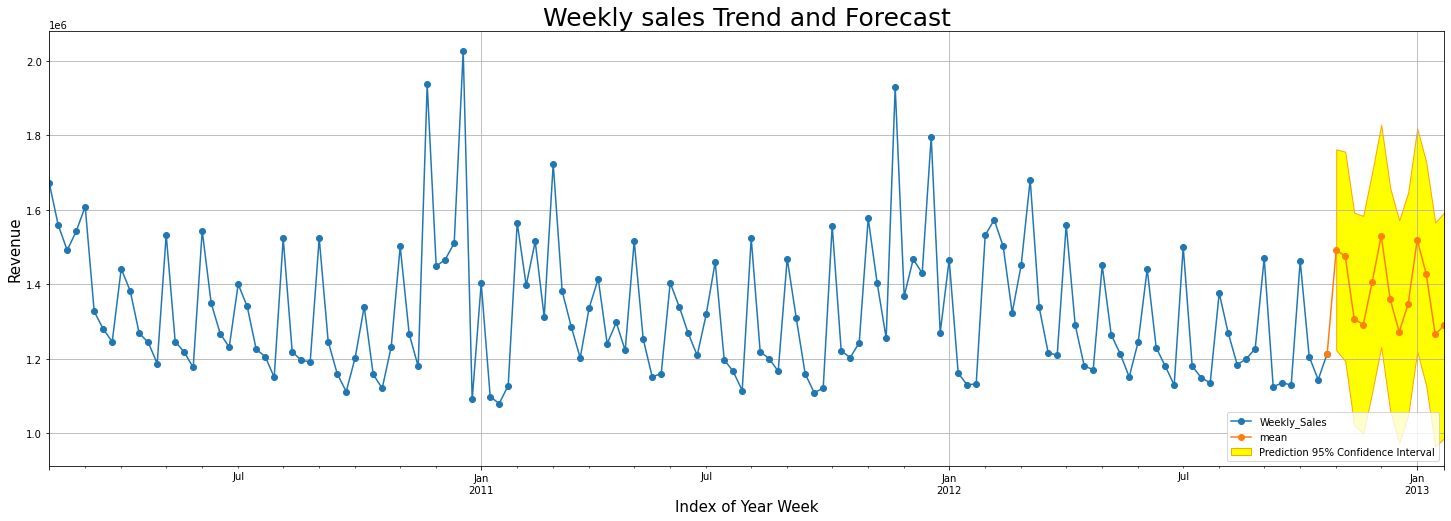

In [143]:
f,ax=plt.subplots(nrows=1, ncols=1, figsize=(25,8))
final_plot[['Weekly_Sales','mean']].plot(ax=ax,marker='o')
plt.fill_between(final_plot.index,final_plot['mean_ci_lower'],final_plot['mean_ci_upper'],color = 'yellow',edgecolor='orange',label='Prediction 95% Confidence Interval')

#final_plot[['mean_ci_lower','mean_ci_upper']].plot(figsize=(16,6),marker='o')
plt.title('Weekly sales Trend and Forecast',size=25)
plt.xlabel('Index of Year Week',size=15)
plt.ylabel('Revenue',size=15)
plt.legend(loc='lower right')
plt.grid();

#### Forecasted Values 

In [144]:
#### Forecasted Values 

final_plot.tail(20).rename(columns={'mean':'Forecasted Values'}).style.format('{:,.0f}',na_rep='')

,Weekly_Sales,Forecasted Values,mean_ci_lower,mean_ci_upper
2012-09-14 00:00:00,"1,124,661",,,
2012-09-21 00:00:00,"1,135,340",,,
2012-09-28 00:00:00,"1,129,509",,,
2012-10-05 00:00:00,"1,462,941",,,
2012-10-12 00:00:00,"1,205,537",,,
2012-10-19 00:00:00,"1,143,724",,,
2012-10-26 00:00:00,"1,213,861","1,213,861",,
2012-11-02 00:00:00,,"1,492,533","1,222,941","1,762,124"
2012-11-09 00:00:00,,"1,475,039","1,194,101","1,755,977"
2012-11-16 00:00:00,,"1,307,209","1,022,611","1,591,808"
